### <p style="text-align: center;">IMDB Movie Reviews with Ratings <br/> Final Project</p>
#### <p style="text-align: center;">DSC680 – Applied Data Science <br/> Winter 2021 <br/> Manish Kalkar</p>
### <p style="text-align: center;">Milestone 3 - Final Code</p>

### Exploratory Data Analysis

#### Load Libraries

In [63]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import re
import string

#### Load the dataset into the DataFrame

In [64]:
# Load the dataset into the DataFrame
df_feedback = pd.read_csv("imdb_sup.csv")

#### Display the data

In [65]:
# Display the data
df_feedback

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1
...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0
49997,Just listen to the Broadway cast album and to ...,3,0
49998,I have been a fan of the Carpenters for a long...,3,0


In [66]:
# Find the total number of rows (customer reviews) in DatFrame
df_feedback.shape

(50000, 3)

In [67]:
# Display columns of the DataFrame
# iterating through the columns
for feedback_columns in df_feedback.columns:
    print(feedback_columns)

Review
Rating
Sentiment


<P>
The goal is to perform the analysis of the IMDB Movie Reviews along with the Sentiment Analysis of the reviews and build model to predict the Overall Rating of the Movies. Review and Rating are the only relevant features / columns in the dataset.
</P>

### 1. Plot the Total Number of Ratings (Counts) of the IMDB Reviews

In [68]:
# Counts of each Rating of the IMDB Movie review in the DataFrame
df_feedback['Rating'].value_counts()

1     10122
10     9731
8      5859
4      5331
3      4961
7      4803
9      4607
2      4586
Name: Rating, dtype: int64

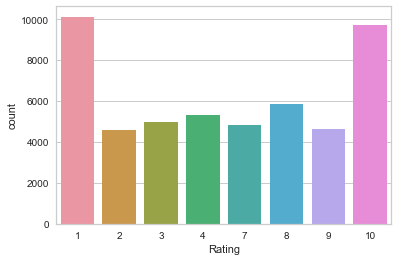

In [69]:
# Plot the counts of each Rating of the IMDB Movie review in the DataFrame
sns.countplot(x=df_feedback['Rating'],data=df_feedback)

<P>
Interestingly Rating 1 has got the highest number of counts followed by 10, 8 and 4. The reviews seem to have Ratings that are distributed almost evenly across from the happiest movie watchers with Rating 10 has Count of 9731 are almost the same as unhappiest movie watchers with Rating 1 that has count of 10122.
</P>

### 2. Plot the Total Number of Overall Ratings (Percentages) of the customer reviews

In [70]:
# Calculate percentages of each Rating of the IMDB Movie review in the DataFrame
df_feedback['Rating'].value_counts(normalize=True)*100

1     20.244
10    19.462
8     11.718
4     10.662
3      9.922
7      9.606
9      9.214
2      9.172
Name: Rating, dtype: float64

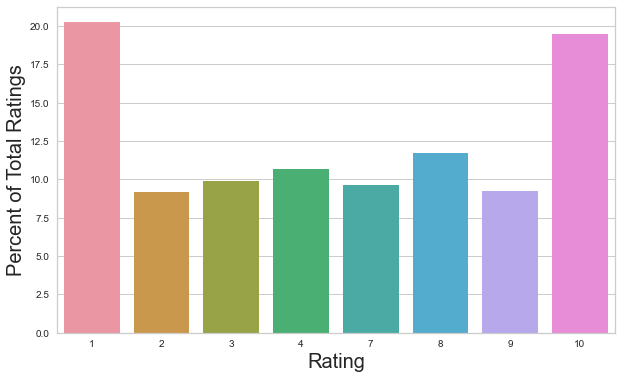

In [71]:
# Plot the Ratings - Percentages
t=pd.DataFrame(data=df_feedback['Rating'].value_counts(normalize=True)*100)
plt.figure(figsize=(10,6))
sns.barplot(x=t.index, y=t.Rating)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Percent of Total Ratings',fontsize=20)
plt.show()

<P>
Based on the count, Rating 1 has got the highest percentages followed by 10, 8 and 4. The reviews seem to have Ratings that are distributed evenly across from the happiest movie watchers with Rating 10 are about 20%, which are almost the same as unhappiest movie watchers with Rating 1 are 19.46%.
</P>

### 3. Plot the Pie Chart showing Overall Ratings - Percentages

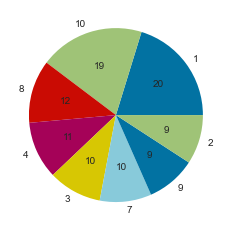

In [72]:
# Assign the labels - Rating
x = ['1','10','8','4','3','7','9','2']

# Calculate the percentage of each Overall Rating
y = df_feedback['Rating'].value_counts(normalize=True)*100

# Define function to covert percentages into actual values
# to be displayed on the pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# plot the pie chart
plt.pie(y, labels = x, autopct = autopct_format(y))
plt.show()

<P>
Above Pie Chart shows the Rating 1 has got the highest percentages followed by 10, 8 and 4. The reviews seem to have Ratings that are distributed evenly across from the happiest movie watchers with Rating 10 are about 20%, which are almost the same as unhappiest moview watchers with Rating 1 are 19%.
</P>

In [73]:
# Rename the Sentiment column with Original Sentiment
df_feedback.rename(columns = { 'Sentiment':'OriginalSentiment'}, inplace = True)

### Check if there are any missing data issues

In [74]:
# Determine / Find missing values
df_feedback.isnull().sum()

Review               0
Rating               0
OriginalSentiment    0
dtype: int64

## Sentiment Analysis

### Sentiment Analysis has been performed based on below listed methods:

1. VADER
2. textblob
3. Based on mapping of Overall Rating Score

In [75]:
# Add two new features / columns to accomodate sentiment data
# Initialize new columns with no values
df_feedback['sentiment'] = ""
df_feedback['sentimentScore'] = ""

In [76]:
# Display DataFrame with two new features
df_feedback

,Review,Rating,OriginalSentiment,sentiment,sentimentScore
0,"Kurt Russell's chameleon-like performance, cou...",10,1,,
1,It was extremely low budget(it some scenes it ...,8,1,,
2,James Cagney is best known for his tough chara...,8,1,,
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,,
4,One of the last classics of the French New Wav...,10,1,,
...,...,...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0,,
49996,"So, you've seen the Romero movies, yes? And yo...",1,0,,
49997,Just listen to the Broadway cast album and to ...,3,0,,
49998,I have been a fan of the Carpenters for a long...,3,0,,


### Sentiment Analysis - Method 1 - Using VADER

In [77]:
# Find the Sentiment Analysis using VADER for each record in the DataFrame

# Create a VADER SentimentIntensityAnalyzer object.
sid_obj = SentimentIntensityAnalyzer()

# Loop through each record in the DataFrame
for index, row in df_feedback.iterrows():

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.    
    sentiment_dict = sid_obj.polarity_scores(row['Review'])
    
    # decide sentiment as positive, negative and neutral
    # sentiment - sentiment data (pos - Postive, neg - Negative, neu - Neutral)
    # sentimentScore - measure sentiment (2 for Postive, 0 for Negative and 0 for Neutral)
    if sentiment_dict['compound'] >= 0.05:
        df_feedback.at[index, 'sentiment'] = "pos"
        df_feedback.at[index, 'sentimentScore'] = 2
    elif sentiment_dict['compound'] <= - 0.05:
        df_feedback.at[index, 'sentiment'] = "neg"
        df_feedback.at[index, 'sentimentScore'] = 0 
    else:
        df_feedback.at[index, 'sentiment'] = "neu"
        df_feedback.at[index, 'sentimentScore'] = 1

In [78]:
# Display the DataFrame with Sentiment Data
df_feedback

,Review,Rating,OriginalSentiment,sentiment,sentimentScore
0,"Kurt Russell's chameleon-like performance, cou...",10,1,pos,2
1,It was extremely low budget(it some scenes it ...,8,1,neg,0
2,James Cagney is best known for his tough chara...,8,1,pos,2
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,pos,2
4,One of the last classics of the French New Wav...,10,1,pos,2
...,...,...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0,pos,2
49996,"So, you've seen the Romero movies, yes? And yo...",1,0,neg,0
49997,Just listen to the Broadway cast album and to ...,3,0,pos,2
49998,I have been a fan of the Carpenters for a long...,3,0,pos,2


In [79]:
# Determine percentage of Postive, Negative and Neutral Reviews
df_feedback.sentimentScore.value_counts(normalize=True)*100

2    66.154
0    33.144
1     0.702
Name: sentimentScore, dtype: float64

#### There are 66% positive reviews and about 33% with negative reviews.

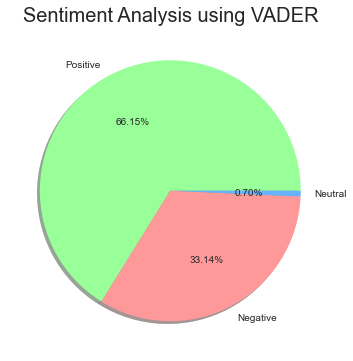

In [80]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
colors=['#99ff99','#ff9999','#66b3ff']
 
plt.pie(df_feedback['sentimentScore'].value_counts(normalize=True),colors=colors,labels=['Positive','Negative','Neutral'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis using VADER',fontsize=20)

plt.show()

### Sentiment Analysis - Method 2 - Using textblob and NaiveBayesAnalyzer

In [81]:
# Find the Sentiment Analysis using textBlob Blobber for each record in the DataFrame
tb = Blobber(analyzer=NaiveBayesAnalyzer())
for index, row in df_feedback.iterrows():
    blob = tb(row['Review'])
    sentiment = blob.sentiment.classification
    # sentiment - sentiment data (pos - Postive, neg - Negative)
    # sentimentScore - measure sentiment (1 for Postive, 0 for Negative)    
    if sentiment == "pos":
        df_feedback.at[index, 'sentiment'] = "pos"
        df_feedback.at[index, 'sentimentScore'] = 1
    elif sentiment == "neg":
        df_feedback.at[index, 'sentiment'] = "neg"
        df_feedback.at[index, 'sentimentScore'] = 0

In [82]:
# Display the DataFrame with Sentiment Data
df_feedback

,Review,Rating,OriginalSentiment,sentiment,sentimentScore
0,"Kurt Russell's chameleon-like performance, cou...",10,1,pos,1
1,It was extremely low budget(it some scenes it ...,8,1,pos,1
2,James Cagney is best known for his tough chara...,8,1,pos,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,pos,1
4,One of the last classics of the French New Wav...,10,1,pos,1
...,...,...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0,neg,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0,neg,0
49997,Just listen to the Broadway cast album and to ...,3,0,pos,1
49998,I have been a fan of the Carpenters for a long...,3,0,pos,1


In [83]:
# Determine percentage of Postive, Negative Reviews
df_feedback.sentimentScore.value_counts(normalize=True)*100

1    70.67
0    29.33
Name: sentimentScore, dtype: float64

#### There are about 71% positive reviews and 29% with negative reviews.

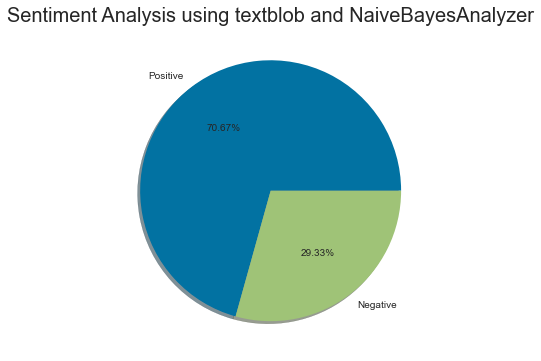

In [84]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
#colors=['#99ff99','#ff9999']
 
plt.pie(df_feedback['sentimentScore'].value_counts(normalize=True),labels=['Positive','Negative'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis using textblob and NaiveBayesAnalyzer',fontsize=20)

plt.show()

### Sentiment Analysis - Method 3 - Based on Original Sentiment Score given the dataset

In [85]:
# Determine percentage of Postive and Negative Reviews
df_feedback.OriginalSentiment.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: OriginalSentiment, dtype: float64

#### There are 50% positive reviews and 50% with negative reviews.

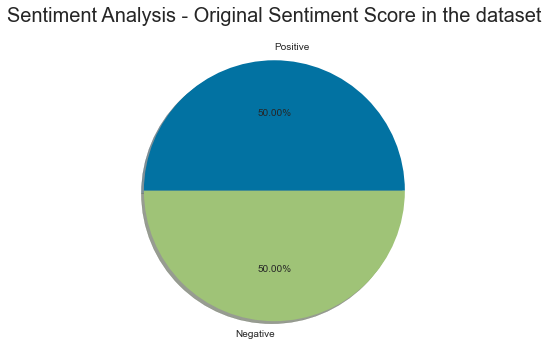

In [86]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
#colors=['#99ff99','#ff9999']
 
plt.pie(df_feedback['OriginalSentiment'].value_counts(normalize=True),labels=['Positive','Negative'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis - Original Sentiment Score in the dataset',fontsize=20)

plt.show()

### Data Preparaion

#### Feature Engineering

#### Make raw data ready for modeling

In [87]:
# Define function to perform below text cleaning
# Make text lowercase
# Remove text in square brackets
# Remove links
# Remove special characters
# Remove words containing numbers
# Remove punctuation

def text_cleaning(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [88]:
# Apply text cleaning function to the DataFrame
df_feedback['Review'] = df_feedback['Review'].apply(text_cleaning)

In [89]:
# Display the cleaned data
df_feedback

,Review,Rating,OriginalSentiment,sentiment,sentimentScore
0,kurt russell s chameleon like performance cou...,10,1,pos,1
1,it was extremely low budget it some scenes it ...,8,1,pos,1
2,james cagney is best known for his tough chara...,8,1,pos,1
3,following the brilliant goyôkiba aka hanz...,8,1,pos,1
4,one of the last classics of the french new wav...,10,1,pos,1
...,...,...,...,...,...
49995,spoiler it could be the one the worst movie ...,4,0,neg,0
49996,so you ve seen the romero movies yes and yo...,1,0,neg,0
49997,just listen to the broadway cast album and to ...,3,0,pos,1
49998,i have been a fan of the carpenters for a long...,3,0,pos,1


#### Vectorizing text data

In [90]:
# TFIDF Vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
featureCounts = tfidf.fit_transform(df_feedback.Review)
tfidf_transformer = TfidfTransformer()
features = tfidf_transformer.fit_transform(featureCounts)
labels = df_feedback.Rating
features.shape

(50000, 154565)

In [91]:
# Bag of Words
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(df_feedback['Review'].values) 

# Use the fitted CountVectorizer to convert the text to vector
bow = vectorizer.transform(df_feedback['Review'].values)

bow.shape

(50000, 253214)

### Methods - Model Selection and Evaluation

In [92]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from scipy import interp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer

import keras
from keras.models import Sequential
from keras.layers import Dense

import re
import string
from numpy import mean
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [93]:
# Display the data
df_feedback

,Review,Rating,OriginalSentiment,sentiment,sentimentScore
0,kurt russell s chameleon like performance cou...,10,1,pos,1
1,it was extremely low budget it some scenes it ...,8,1,pos,1
2,james cagney is best known for his tough chara...,8,1,pos,1
3,following the brilliant goyôkiba aka hanz...,8,1,pos,1
4,one of the last classics of the french new wav...,10,1,pos,1
...,...,...,...,...,...
49995,spoiler it could be the one the worst movie ...,4,0,neg,0
49996,so you ve seen the romero movies yes and yo...,1,0,neg,0
49997,just listen to the broadway cast album and to ...,3,0,pos,1
49998,i have been a fan of the carpenters for a long...,3,0,pos,1


In [94]:
# Drop the unnecessary features from the dataset that are not needed for modeling
df_feedback = df_feedback.drop(['OriginalSentiment','sentiment','sentimentScore'],axis=1)

In [95]:
# Display the cleaned data
df_feedback

,Review,Rating
0,kurt russell s chameleon like performance cou...,10
1,it was extremely low budget it some scenes it ...,8
2,james cagney is best known for his tough chara...,8
3,following the brilliant goyôkiba aka hanz...,8
4,one of the last classics of the french new wav...,10
...,...,...
49995,spoiler it could be the one the worst movie ...,4
49996,so you ve seen the romero movies yes and yo...,1
49997,just listen to the broadway cast album and to ...,3
49998,i have been a fan of the carpenters for a long...,3


In [96]:
# Simplify Rating by re-assigning the values as below
# Rating 4 and above = 1
# Rating 3 and below = 0
df_feedback['Rating'] = df_feedback.Rating.apply(lambda x: 1 if x>=4.0 else 0)
df_feedback

,Review,Rating
0,kurt russell s chameleon like performance cou...,1
1,it was extremely low budget it some scenes it ...,1
2,james cagney is best known for his tough chara...,1
3,following the brilliant goyôkiba aka hanz...,1
4,one of the last classics of the french new wav...,1
...,...,...
49995,spoiler it could be the one the worst movie ...,1
49996,so you ve seen the romero movies yes and yo...,0
49997,just listen to the broadway cast album and to ...,0
49998,i have been a fan of the carpenters for a long...,0


In [97]:
# Display value counts for Rating
df_feedback.Rating.value_counts()

1    30331
0    19669
Name: Rating, dtype: int64

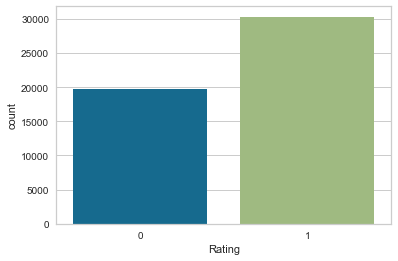

In [98]:
sns.countplot(df_feedback.Rating)

In [99]:
# Calculate percentages of each Rating of the IMDB Moview review in the DataFrame
df_feedback['Rating'].value_counts(normalize=True)*100

1    60.662
0    39.338
Name: Rating, dtype: float64

### Split the data for modeling

In [100]:
#split the data
X = df_feedback.Review
y = df_feedback.Rating

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

### Vectorizing text data

In [101]:
# TFIDF Vectorizer

tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,2), stop_words='english')

tfidf_x_train = tv.fit_transform(x_train)
tfidf_x_test = tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)

tfidf_x_train: (40000, 2048395)
tfidf_x_test: (10000, 2048395)


## Model Selection

### With over 60% of positive customer feedback reviews, as many as five types of models are selected to run as listed below:

1. Multinomial Naive Bayes
2. Random Forest
3. Linear SVC
4. Logistic Regression
5. XGB Classifier
6. Logistic Regression Model using class_weight
7. Neural Network Classifier with Keras

### 1. Naive Bayes

In [102]:
#Naive Bayes
nb = MultinomialNB()

#fit
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
nb_tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_tfidf = accuracy_score(y_test,nb_tfidf_predict)

# f1 Score
nb_f1 = f1_score(y_test, nb_tfidf_predict, average= 'weighted')

print('NB accuracy:', nb_tfidf)
print('NB f1:', nb_f1)
print(classification_report(y_test, nb_tfidf_predict))

NB accuracy: 0.6179
NB f1: 0.4849698378546941
              precision    recall  f1-score   support

           0       0.94      0.03      0.06      3938
           1       0.61      1.00      0.76      6062

    accuracy                           0.62     10000
   macro avg       0.78      0.52      0.41     10000
weighted avg       0.74      0.62      0.48     10000



#### MultinomialNB Confusion Matrix

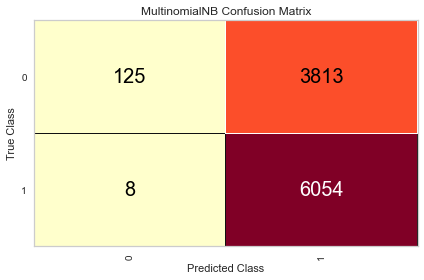

In [103]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(nb, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

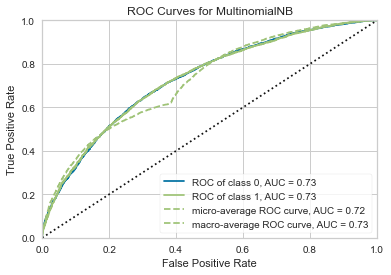

In [104]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(nb)

visualizer.fit(tfidf_x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(tfidf_x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 2. Random Forest

In [105]:
#random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
rf_tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_tfidf = accuracy_score(y_test,rf_tfidf_predict)

# f1 Score
rf_f1 = f1_score(y_test, rf_tfidf_predict, average= 'weighted')

print('rf accuracy:', rf_tfidf)
print('rf f1:', rf_f1)
print(classification_report(y_test, rf_tfidf_predict))

rf accuracy: 0.6062
rf f1: 0.4575749470800648
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3938
           1       0.61      1.00      0.75      6062

    accuracy                           0.61     10000
   macro avg       0.30      0.50      0.38     10000
weighted avg       0.37      0.61      0.46     10000



#### Random Forest Classifier Confusion Matrix

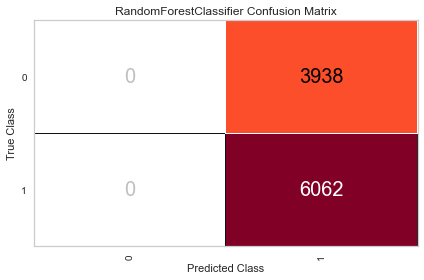

In [106]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(rf, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 3. Linear SVC

In [107]:
#Linear SVC
ls = LinearSVC()

#fit
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
ls_tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_tfidf = accuracy_score(y_test,ls_tfidf_predict)

# f1 Score
ls_f1 = f1_score(y_test, ls_tfidf_predict, average= 'weighted')

print('ls accuracy:', ls_tfidf)
print('ls f1:', ls_f1)
print(classification_report(y_test, ls_tfidf_predict))

ls accuracy: 0.6393
ls f1: 0.5413708105310395
              precision    recall  f1-score   support

           0       0.81      0.11      0.19      3938
           1       0.63      0.98      0.77      6062

    accuracy                           0.64     10000
   macro avg       0.72      0.55      0.48     10000
weighted avg       0.70      0.64      0.54     10000



#### Linear SVC Confusion Matrix

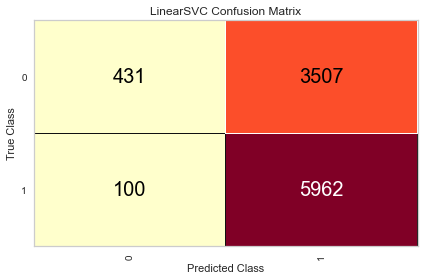

In [108]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(ls, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 4. Logistic Regression

In [109]:
#lr
lr = LogisticRegression(solver='newton-cg')

#fit
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
lr_tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_tfidf = accuracy_score(y_test,lr_tfidf_predict)

# f1 Score
lr_f1 = f1_score(y_test, lr_tfidf_predict, average= 'weighted')

print('lr accuracy:', lr_tfidf)
print('lr f1:', lr_f1)
print(classification_report(y_test, lr_tfidf_predict))

lr accuracy: 0.6151
lr f1: 0.47769966502483824
              precision    recall  f1-score   support

           0       0.99      0.02      0.04      3938
           1       0.61      1.00      0.76      6062

    accuracy                           0.62     10000
   macro avg       0.80      0.51      0.40     10000
weighted avg       0.76      0.62      0.48     10000



#### Logistic Regression Confusion Matrix

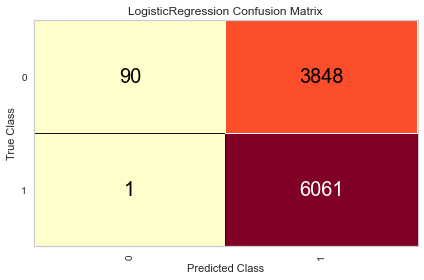

In [110]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(lr, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 5. XGB CLASSIFIER

### Hyperparameter Tuning

In [111]:
#RandomSearchCV
# define the parameters to tune
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}
#instance of RandomSearchCV
rs = RandomizedSearchCV(XGBClassifier(eval_metric='mlogloss'), param_distributions=param_dist, n_iter=3)

### Create Data Pipeline

In [112]:
model  = Pipeline([
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', rs)
])

In [113]:
#fit
tfidf = model.fit(x_train, y_train)

#predict
xgb_tfidf_predict = model.predict(x_test)

#accuracy
xgb_tfidf = accuracy_score(y_test, xgb_tfidf_predict)

# f1 Score
xgb_f1 = f1_score(y_test, xgb_tfidf_predict, average= 'weighted')

print('xgb accuracy:', xgb_tfidf)
print('xgb f1:', xgb_f1)
print(classification_report(y_test, xgb_tfidf_predict))

xgb accuracy: 0.8193
xgb f1: 0.8181989600911407
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3938
           1       0.84      0.87      0.85      6062

    accuracy                           0.82     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



In [114]:
# Separate function to create a confusion matrix for XGB Classifier 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

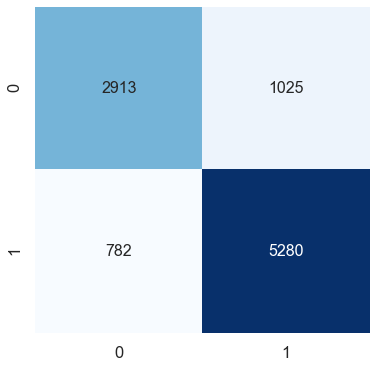

In [115]:
#Calling function to plot Confusion Matrix for XGB Classifier
conf_matrix(y_test, xgb_tfidf_predict)

### 6. Logistic Regression model with class_weight

In [116]:
#lr-cw
lrcw = LogisticRegression(solver='newton-cg', class_weight='balanced')

#fit
tfidf = lrcw.fit(tfidf_x_train, y_train)

#predict
lrcw_tfidf_predict = lrcw.predict(tfidf_x_test)

#accuracy
lrcw_tfidf = accuracy_score(y_test, lrcw_tfidf_predict)

# f1 Score
lrcw_f1 = f1_score(y_test, lrcw_tfidf_predict, average= 'weighted')

print('lrcw accuracy:', lrcw_tfidf)
print('lrcw f1:', lrcw_f1)
print(classification_report(y_test, lrcw_tfidf_predict))

lrcw accuracy: 0.6643
lrcw f1: 0.6110325257614779
              precision    recall  f1-score   support

           0       0.72      0.24      0.36      3938
           1       0.66      0.94      0.77      6062

    accuracy                           0.66     10000
   macro avg       0.69      0.59      0.57     10000
weighted avg       0.68      0.66      0.61     10000



#### Logistic Regression (class_weight) Confusion Matrix

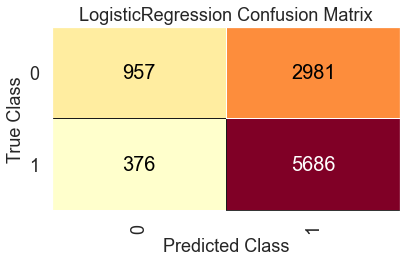

In [117]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(lrcw, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 7. Neural Network Classifier with Keras

In [120]:
# convert categories into an array
y = np.array(y)

In [121]:
# Encode target variables with value between 0 and n_classes-1 (n_classes = 3)
label_encoder = preprocessing.LabelEncoder()
int_encode = label_encoder.fit_transform(y)

In [122]:
# Encode categorical features as a one-hot numeric array.
# input is an array - int_encode created above
# This creates a binary column for each category in y
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
int_encode = int_encode.reshape(len(int_encode), 1)
y = onehot_encoder.fit_transform(int_encode)

In [123]:
# Set the number of features we want
number_of_features = 5000

In [124]:
# convert feature data X to feature matrix
token = Tokenizer(num_words=number_of_features)
token.fit_on_texts(X)
seq_X = token.texts_to_sequences(X)
X = token.sequences_to_matrix(seq_X, mode='binary')
X.shape

(50000, 5000)

In [125]:
#split the original data again after tokenization
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [126]:
# display shape of target train
y_train.shape

(40000, 2)

In [127]:
# Set the Neural network
model = Sequential()
model.add(Dense(48, activation='relu', input_shape = (number_of_features,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1)
history

Epoch 1/10
563/563 [==============================] - 183s 25ms/step - loss: 0.4428 - accuracy: 0.7925 - val_loss: 0.3447 - val_accuracy: 0.8475
Epoch 2/10
563/563 [==============================] - 7s 12ms/step - loss: 0.2755 - accuracy: 0.8827 - val_loss: 0.3461 - val_accuracy: 0.8487
Epoch 3/10
563/563 [==============================] - 7s 13ms/step - loss: 0.2125 - accuracy: 0.9139 - val_loss: 0.3906 - val_accuracy: 0.8428
Epoch 4/10
563/563 [==============================] - 6s 11ms/step - loss: 0.1305 - accuracy: 0.9526 - val_loss: 0.4769 - val_accuracy: 0.8388
Epoch 5/10
563/563 [==============================] - 7s 12ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.6337 - val_accuracy: 0.8340
Epoch 6/10
563/563 [==============================] - 7s 12ms/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.7978 - val_accuracy: 0.8273
Epoch 7/10
563/563 [==============================] - 6s 11ms/step - loss: 0.0069 - accuracy: 0.9992 - val_loss: 0.9662 - val_accuracy: 0.82

In [129]:
#predict
y_pred = model.predict(X_test)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

#accuracy
nn_keras_accuracy = accuracy_score(y_test,y_pred)

# f1 Score
nn_keras_f1 = f1_score(y_test, y_pred, average= 'weighted')

# confusion matrix
nn_keras_matrix = confusion_matrix(y_test, y_pred)

print('nn keras accuracy:', nn_keras_accuracy)
print('nn keras f1 score:', nn_keras_f1)
print('nn keras confusion matrix:')
print(nn_keras_matrix)
print(classification_report(y_test, y_pred))

nn keras accuracy: 0.8175
nn keras f1 score: 0.8172272609822093
nn keras confusion matrix:
[[2993  945]
 [ 880 5182]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3938
           1       0.85      0.85      0.85      6062

    accuracy                           0.82     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



#### Neural Network Classifier with Keras - Confusion Matrix

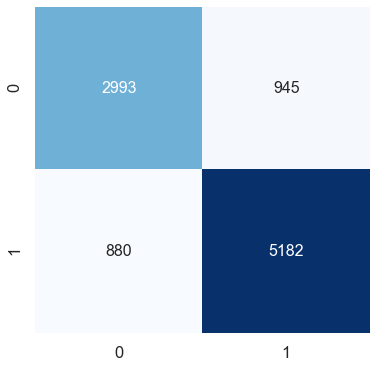

In [130]:
#Calling function to plot Confusion Matrix for Neural Network with Keras
conf_matrix(y_test, y_pred)

## Results - Model Evaluation

#### Model evaluation based on accuracy

In [131]:
# Compare all the model results
model_accuracy_data = {'model': ['Naive Bayes', 'Random Forest', 'Linear SVC', 'Logistic Regression', 'XGB Classifier', 'Logistic Regression - class_weight', 'Neural Network Classifier with Keras'], 
 'accuracy': [nb_tfidf * 100, rf_tfidf * 100, ls_tfidf * 100, lr_tfidf * 100, xgb_tfidf * 100, lrcw_tfidf * 100, nn_keras_accuracy * 100]
}
df_model_accuracy = pd.DataFrame(model_accuracy_data, columns = ['model', 'accuracy'])
df_model_accuracy

,model,accuracy
0,Naive Bayes,61.79
1,Random Forest,60.62
2,Linear SVC,63.93
3,Logistic Regression,61.51
4,XGB Classifier,81.93
5,Logistic Regression - class_weight,66.43
6,Neural Network Classifier with Keras,81.75


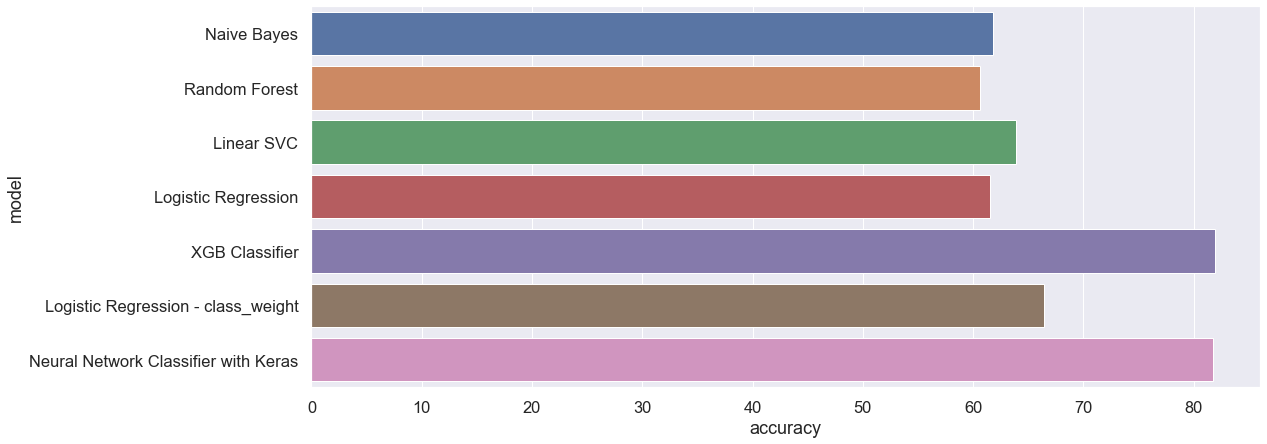

In [132]:
# Plot the Model Comparison based on accuracy
plt.figure(figsize = (17,7))
sns.barplot(y = df_model_accuracy.model, x = df_model_accuracy.accuracy)

### Based on the Results / Model Evaluation, the accuracy of the XGB Classifier and Neural Network with Keras shows best results as below:

### XGB Classifier - 81.93%
### Neural Network Classifier with Keras - 81.75%